In [70]:
import matplotlib.pyplot as plt
import pandas as pd
import glob
import numpy as np
from scipy.stats import gmean


In [102]:
def get_plot_for_column(column_num):
    files = ["dense_model",
            "SRSTE_NM_2_4",
            # # "SRSTE_NM_1_4",
            # # "SRSTE_NM_1_64",
            # # "SRSTE_NM_1_128",
            # # "STRUCT_NM_2_4",
            # # "STRUCT_NM_1_4",
            # # "STRUCT_NM_1_64",
            # # "STRUCT_NM_1_128",
            "STRUCT_EXP_NM_2_4",
            "STRUCT_LINEAR_NM_2_4"
            ]

    data = []

    for file in files:
        df = pd.read_csv("vit_model_stats/"+file+"/model_stats.csv")

        # Group the columns into groups of 4, compute the geometric mean of each group, and create a new DataFrame
        df_geomean = pd.DataFrame({'Mean': gmean(abs(df.iloc[:, 1::4]), axis=1),
                                   'Std': gmean(abs(df.iloc[:, 2::4]), axis=1),
                                   'Sparse Mean': gmean(abs(df.iloc[:, 3::4]), axis=1),
                                   'Sparse Std': gmean(abs(df.iloc[:, 4::4]), axis=1),})

        # df['diff'] = df[].diff()

        df_geomean['diff'] = df_geomean[df_geomean.columns[column_num]] - df_geomean[df_geomean.columns[column_num]].shift(1)

        
        data.append(df_geomean.iloc[:, -1])
        # data.append(df.iloc[:, column_num])

    plt.figure(figsize=(10, 5))
    for i, d in zip(files,data):
        # Compute the moving average of the data with a window size of 10
        window_size = 400
        moving_avg = np.convolve(d, np.ones(window_size)/window_size, mode='valid')

        plt.plot(moving_avg, label=f'{i}')

    # plt.plot(np.zeros(moving_avg.shape), c='grey)
    plt.xlabel('Steps')
    plt.ylabel('Magnitude')
    # plt.ylim(bottom=-0.5e-6)
    # plt.xlim(right=2000)
    plt.title(f'Line graph of {df_geomean.columns[column_num]} files')
    plt.legend()
    plt.show()


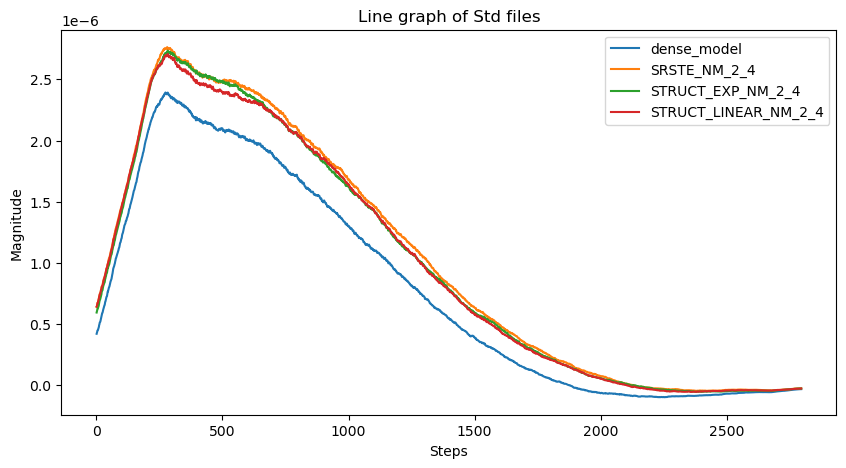

In [108]:
get_plot_for_column(1)

In [69]:
import pandas as pd
from scipy.stats import gmean

# Create a sample DataFrame with 12 columns
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6], 'C': [7, 8, 9], 'D': [10, 11, 12],
                   'E': [13, 14, 15], 'F': [16, 17, 18], 'G': [19, 20, 21], 'H': [22, 23, 24],
                   'I': [25, 26, 27], 'J': [28, 29, 30], 'K': [31, 32, 33], 'L': [34, 35, 36]})

# Group the columns into groups of 4, compute the geometric mean of each group, and create a new DataFrame
grouped_df = pd.DataFrame({'Group 1': gmean(df.iloc[:, 0::4], axis=1),
                           'Group 2': gmean(df.iloc[:, 1::4], axis=1),
                           'Group 3': gmean(df.iloc[:, 2::4], axis=1)})

# Print the new DataFrame
print(grouped_df)


     Group 1    Group 2    Group 3
0   6.875344  12.146356  16.035079
1   8.995883  13.508454  17.235478
2  10.670680  14.797272  18.407377


In [68]:
df

,A,B,C,D,E,F,G,H,I,J,K,L
0,1,4,7,10,13,16,19,22,25,28,31,34
1,2,5,8,11,14,17,20,23,26,29,32,35
2,3,6,9,12,15,18,21,24,27,30,33,36
